<a href="https://colab.research.google.com/github/mikashaw/BookRecSite/blob/main/MusicNet/musicNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import tensorflow as tf
import numpy as np
import librosa, librosa.display
import IPython.display as ipd
from google.colab import files
import matplotlib.pyplot as plt
import os

In [2]:
# get the data from kaggle api

!pip install kaggle

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mikashaw","key":"5ea1167847d0f4828837c42bb91725e5"}'}

In [5]:
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d imsparsh/musicnet-dataset

100% 21.5G/21.5G [04:41<00:00, 93.8MB/s]
100% 21.5G/21.5G [04:41<00:00, 82.1MB/s]


In [7]:
!unzip musicnet-dataset.zip

Archive:  musicnet-dataset.zip
  inflating: musicnet.npz            
  inflating: musicnet/musicnet/test_data/1759.wav  
  inflating: musicnet/musicnet/test_data/1819.wav  
  inflating: musicnet/musicnet/test_data/2106.wav  
  inflating: musicnet/musicnet/test_data/2191.wav  
  inflating: musicnet/musicnet/test_data/2298.wav  
  inflating: musicnet/musicnet/test_data/2303.wav  
  inflating: musicnet/musicnet/test_data/2382.wav  
  inflating: musicnet/musicnet/test_data/2416.wav  
  inflating: musicnet/musicnet/test_data/2556.wav  
  inflating: musicnet/musicnet/test_data/2628.wav  
  inflating: musicnet/musicnet/test_labels/1759.csv  
  inflating: musicnet/musicnet/test_labels/1819.csv  
  inflating: musicnet/musicnet/test_labels/2106.csv  
  inflating: musicnet/musicnet/test_labels/2191.csv  
  inflating: musicnet/musicnet/test_labels/2298.csv  
  inflating: musicnet/musicnet/test_labels/2303.csv  
  inflating: musicnet/musicnet/test_labels/2382.csv  
  inflating: musicnet/musicnet/te

In [8]:
base_dir = "/content/musicnet/musicnet/"
train_data = "/content/musicnet/musicnet/train_data/"
train_labels = "/content/musicnet/musicnet/train_labels/"

In [13]:
# define a file path

sample_filename = "1727.wav"

In [14]:
# loading data into librosa

def load(base_path, filename):

  """

  Args: base path and filename
  Returns: loaded data

  """

  y, _ = librosa.load(os.path.join(base_path, filename))

  return y


In [23]:

def convert(y):

  """

  Args: data (y)
  Returns: data converted via short-time fourier transform in the scale of decibels

  """

  D = librosa.stft(y)
  S_db = librosa.amplitude_to_db(np.abs(D), ref = np.max)
  return S_db


In [30]:
# define a function that plots a spectrogram of a single piece of train data. 

def plot_spectrogram(data):

  """

  Args: converted data (data)
  Returns: spectrogram figure of data

  """

  fig, ax = plt.subplots(figsize = (12,8))
  img =librosa.display.specshow(data, ax = ax, x_axis='time', y_axis='linear')
  ax.set(title = "Plot of sample train data")
  fig.colorbar(img, ax=ax, format = "%2.f dB")
  plt.show()



In [17]:
data = load(train_data, sample_filename)

In [24]:
converted_data = convert(data)

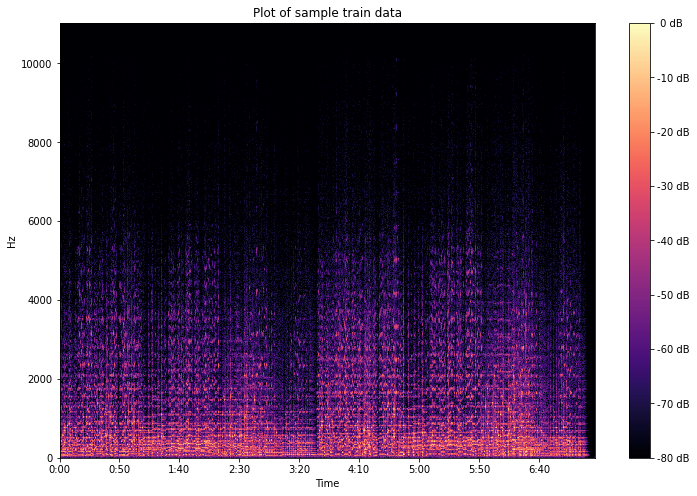

In [31]:
plot_spectrogram(converted_data)